# 선형 이진 분류( Linear Binary Classification )
$$
\hat{y} = w_1x_1+w_2x_2+ \cdots + w_nx_n + b > 0
$$

선형 모델을 학습시키기 위한 알고리즘에 공통적으로 사용되는 기법
* 가중치($w$)와 편향($b$)의 조합이 훈련 데이터에 얼마나 잘 맞는지를 측정
* 사용할 수 있는 규제가 있는지...?($C$)
* $C$의 의미는 얼마나 오차를 허용하지 않을 것인가.
  * $C$가 커지면 커질 수록 오차를 없앤다. - 데이터를 중점적으로 보겠다. - 선형 모델에서는 $w$가 커진다.
  * $C$가 작아지면 작아질수록 오차를 허용 시키겠다.  - 데이터의 추세를 보겠다. - 선형 모델에서는 $w$가 작아지기 시작한다.
  
각 알고리즘 마다 훈련 세트를 잘 학습시키는 방법이 모두 다르다. 잘못된 분류를 모두 수정하기 위한 모델 파라미터 조절은 수학적으로 불가능!

* 로지스틱 회귀 ( Logistic Regression ) - 이진 분류에서 `logistic(sigmoid)` 손실 사용, 다중 분류에서는 교차 엔트로피 손실함수 사용

* 서포트 벡터 머신( Support Vector Machine ) - 제곱 힌지 손실 함수 사용
  * 선형 모드
  * 비선형 모드

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b51e68b224c2612d52863f092d6578796a2a3710e0fd446ecfb912f3999e435a
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


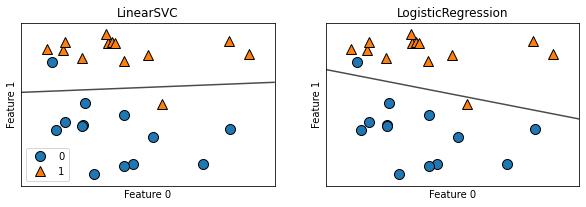

In [ ]:
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend()
plt.show()

# 규제 매개변수 C
* $\alpha$ (패널티): 회귀에서 사용된다.
  * $\alpha$가 늘어나면 가중치를 낮춘다.
  * 가중치의 크기와 반비례
* $C$ (규제) : 분류에서 사용된다.
  * $C$가 늘어나면 오차를 허용하지 않기위해 가중치를 늘린다.
  * 가중치의 크기와 비례

즉 $C$가 커지면 모델은 데이터를 복잡하게 분석하기 시작 - 복잡도가 증가한다.

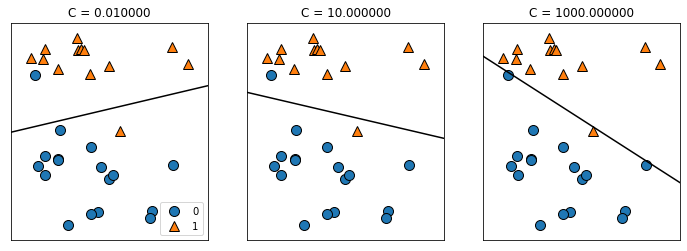

In [ ]:
# C의 변화에 따른 LinearSVC의 기울기 확인
mglearn.plots.plot_linear_svc_regularization()

저차원 데이터 세트 같은 경우는 결정 경계가 직선 또는 평면 까지 밖에 활용 가능. - 제한적

선형 분류 모델은 특성의 개수가 많을 때 힘을 발휘 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)

X_train.shape, y_train.shape

((426, 30), (426,))

In [ ]:
# 기본 C값은 1.0
log_reg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(log_reg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(log_reg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


두 세트의 점수가 모두 높아서 성능은 괜찮긴 하지만 점수가 비슷하다. - 과소적합 가능성이 있다.!

In [ ]:
log_reg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(log_reg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(log_reg100.score(X_test, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.972


In [ ]:
log_reg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(log_reg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(log_reg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


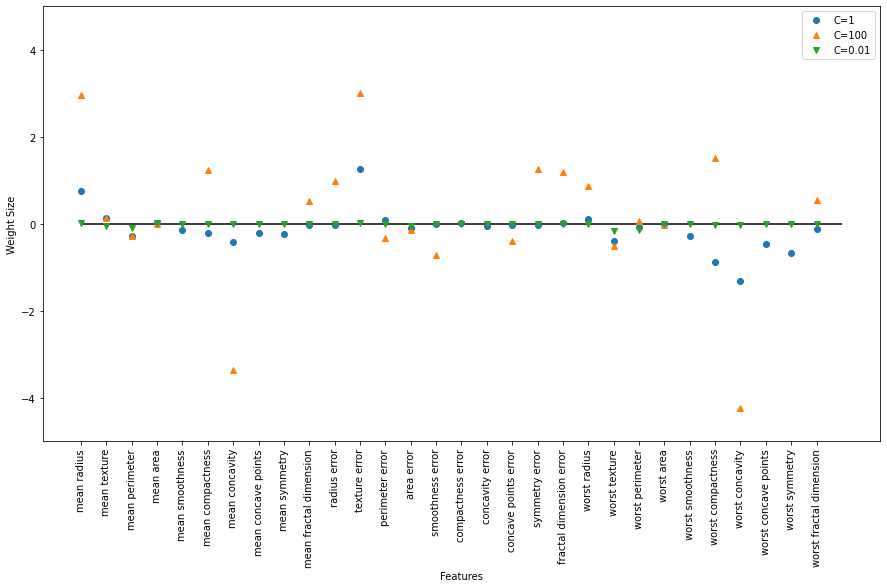

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(log_reg.coef_.T, "o", label="C=1")
plt.plot(log_reg100.coef_.T, "^", label="C=100")
plt.plot(log_reg001.coef_.T, "v", label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel("Features")
plt.ylabel("Weight Size")
plt.legend()
plt.show()

# 선형 다중 분류
`LogisticRegression`을 이용한 다중 분류는 소프트맥스 함수를 사용
$$
Pr(Y_i=c) = \frac{e^{W_c \cdot X_i + b}}{\sum_{k=1}^K{e^{W_k \cdot X_i + b}}}
$$

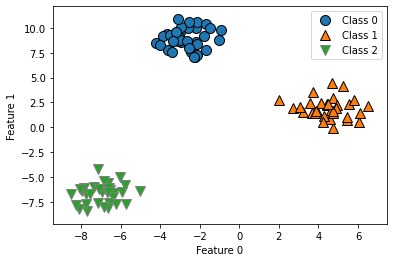

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

# 가중치 확인하기
df_coef = pd.DataFrame(columns=["Feature 0", "Feature 1"], data=linear_svm.coef_)
df_coef

,Feature 0,Feature 1
0,-0.174927,0.231408
1,0.476217,-0.069365
2,-0.189143,-0.203996


In [ ]:
# 절편 확인하기
df_intercept = pd.DataFrame(columns=["intercept"], data=linear_svm.intercept_)
df_intercept

,intercept
0,-1.077454
1,0.131407
2,-0.086048


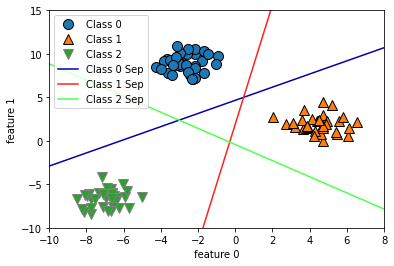

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15, 50)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) # feature 1을 y로 생각했을때..

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Sep", "Class 1 Sep", "Class 2 Sep"])
plt.show()

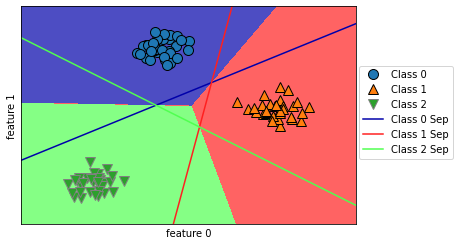

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) # linear_svc의 결정경계 확인하기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15, 50)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
  
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Sep", "Class 1 Sep", "Class 2 Sep"], loc=(1.01, 0.3))
plt.show()

# 정리
선형 모델의 주요 매개변수
* `alpha, C` : 가중치에 연관된 하이퍼 파라미터
  * $\alpha$ : 값이 커지면 가중치가 낮아진다. 회귀에서 사용된다.
  * $C$ : 값이 커지면 가중치가 높아진다. 분류에서 사용된다.
  * `100, 10, 1, 0.1, 0.01` 같은 로그 스케일로 설정하는 것이 보통이다.
* 장단점
  * 장점
    1. 샘플(데이터의 양)에 비해서 특성이 많을 때 잘 작동한다.
    2. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용한다. ( 예를 들어 딥러닝 )
    3. 딥러닝의 기반이 되는 알고리즘
    4. 다른 알고리즘 보다 속도가 빠르다.
  * 단점
    * 저차원 데이터 세트( 특성이 많이 없는 )에서는 일반화 성능이 좋지 않다.